Spark Ćwiczenia

In [1]:
from pyspark.sql import SparkSession

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
spark = SparkSession.builder.getOrCreate()

In [5]:
spark

In [6]:
airports = spark.read.csv("airports.csv",inferSchema=True,header=True)

In [7]:
airports.toPandas()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [12]:
from pyspark.sql.functions import col, asc

Zadania

nr1 Print all the airports that are to the North from Krakow.

In [9]:
airports.filter(col("LATITUDE") > 50).toPandas()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603
1,ADQ,Kodiak Airport,Kodiak,AK,USA,57.74997,-152.49386
2,AKN,King Salmon Airport,King Salmon,AK,USA,58.67680,-156.64922
3,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
4,BET,Bethel Airport,Bethel,AK,USA,60.77978,-161.83800
5,BRW,Wiley Post-Will Rogers Memorial Airport,Barrow,AK,USA,71.28545,-156.76600
6,CDV,Merle K. (Mudhole) Smith Airport,Cordova,AK,USA,60.49183,-145.47765
7,DLG,Dillingham Airport,Dillingham,AK,USA,59.04541,-158.50334
8,FAI,Fairbanks International Airport,Fairbanks,AK,USA,64.81368,-147.85967
9,GST,Gustavus Airport,Gustavus,AK,USA,58.42438,-135.70738


nr2 For each state, find the airport which is closest to the South Pole.

In [13]:
import matplotlib

In [14]:
pd_airports = airports.select("longitude", "latitude").toPandas()

In [15]:
pd_airports

,longitude,latitude
0,-75.44040,40.65236
1,-99.68190,32.41132
2,-106.60919,35.04022
3,-98.42183,45.44906
4,-84.19447,31.53552
...,...,...
317,-132.36982,56.48433
318,-111.11764,44.68840
319,-94.30681,36.28187
320,-139.66023,59.50336


nr3 Plot the coordinates of all the airports. Bonus: plot on the map.

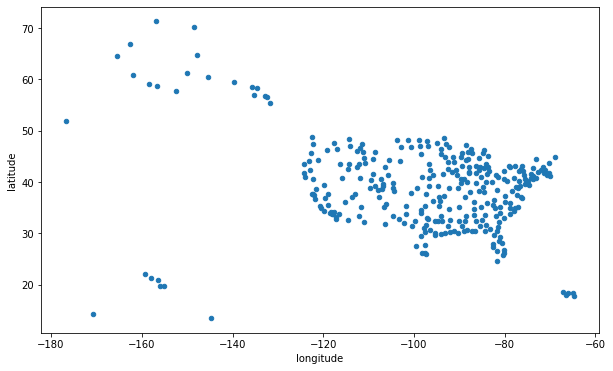

In [16]:
pd_airports.plot(x="longitude", y="latitude", kind="scatter",figsize=(10, 6))

In [17]:
countries = spark.read.csv("countries of the world.csv",inferSchema=True,header=True)

In [18]:
countries.toPandas()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",None,None,None
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,None,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",None,None,NaN,None,None,"0,02",0,"99,98",1,None,None,None,None,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


nr4 Plot GDP vs. Phones for all countries in Asia.

In [19]:
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf

In [20]:
def to_float (s) :
   return float(s.replace(',','.'))

In [21]:
float_udf = udf(to_float , FloatType())

In [22]:
full_countries = countries.select("Region",'GDP ($ per capita)',"Phones (per 1000)" ).na.drop()

In [23]:
full_countries = full_countries.withColumn("Phones", float_udf("Phones (per 1000)"))

In [24]:
full_countries.show()

+--------------------+------------------+-----------------+------+
|              Region|GDP ($ per capita)|Phones (per 1000)|Phones|
+--------------------+------------------+-----------------+------+
|ASIA (EX. NEAR EA...|               700|              3,2|   3.2|
|EASTERN EUROPE   ...|              4500|             71,2|  71.2|
|NORTHERN AFRICA  ...|              6000|             78,1|  78.1|
|OCEANIA          ...|              8000|            259,5| 259.5|
|WESTERN EUROPE   ...|             19000|            497,2| 497.2|
|SUB-SAHARAN AFRIC...|              1900|              7,8|   7.8|
|LATIN AMER. & CAR...|              8600|            460,0| 460.0|
|LATIN AMER. & CAR...|             11000|            549,9| 549.9|
|LATIN AMER. & CAR...|             11200|            220,4| 220.4|
|C.W. OF IND. STATES |              3500|            195,7| 195.7|
|LATIN AMER. & CAR...|             28000|            516,1| 516.1|
|OCEANIA          ...|             29000|            565,5| 56

In [25]:
pd_asia = full_countries.select("GDP ($ per capita)", "Phones")\
.where(col("Region").like("%ASIA%")).toPandas()

In [26]:
pd_asia

,GDP ($ per capita),Phones
0,700,3.200000
1,1900,7.300000
2,1300,14.300000
3,18600,237.199997
4,1800,10.100000
5,1900,2.600000
6,5000,266.700012
7,28800,546.700012
8,2900,45.400002
9,3200,52.000000


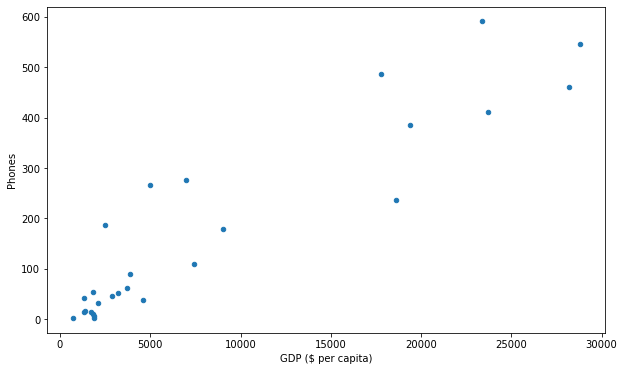

In [27]:
pd_asia.plot(x="GDP ($ per capita)", y="Phones", kind="scatter",figsize=(10, 6))

nr5 Plot Infant mortality vs. Literacy for top 30 richest and top 30 poorest countries.